## Analysis w Regularization techniques for variable selection
### Links:
- Lectures 3 & 4 from Prof Chetverikov
- https://medium.com/@dbertsch/how-to-use-lasso-regularization-to-rank-independent-variables-by-importance-fe9da4d2bf95
- https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-k-nearest-neighbors-dab986e21b60#:~:text=Distance%20Weighting%3A%20Instead%20of%20directly,point%20and%20the%20training%20point.
- https://machinelearningmastery.com/lasso-regression-with-python/

In [1]:
import pandas as pd
import numpy as np
from math import radians
from sklearn. linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from scipy.stats import norm
from sklearn. linear_model import LassoCV
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_regularization')
df.head()

,crime_rate,crime_diff,felony,misdemeanor,completed,s_native,s_apac,s_black,s_bl_hisp,s_white,...,VARIETY STORE,VIDEO STORE,median_age,poverty_rate,unemployment_rate,educ,labor_part,hispanic_rate,black_rate,asian_rate
0,322.95,596.0,1,0,1,0,1,0,0,0,...,0,0,39.0,12.2,5.6,32.2,64.2,27.76,15.85,27.3
1,322.95,364.0,0,1,1,0,0,1,0,0,...,0,0,39.0,12.2,5.6,32.2,64.2,27.76,15.85,27.3
2,322.95,1047.0,0,1,1,0,0,0,0,0,...,0,0,39.0,12.2,5.6,32.2,64.2,27.76,15.85,27.3
3,322.95,364.0,1,0,1,0,0,0,0,0,...,0,0,39.0,12.2,5.6,32.2,64.2,27.76,15.85,27.3
4,322.95,585.0,0,1,1,0,0,1,0,0,...,0,0,39.0,12.2,5.6,32.2,64.2,27.76,15.85,27.3


In [3]:
################################################################################################################################

## Don't scale dummies

In [3]:
pre_scale = df[['median_age','poverty_rate', 'unemployment_rate',  'educ', 'hispanic_rate', 'black_rate', 'asian_rate', 'labor_part', 'crime_diff']]
df = df.drop(['median_age','poverty_rate', 'unemployment_rate',  'educ', 'hispanic_rate', 'black_rate', 'asian_rate', 'labor_part', 'crime_diff'],axis=1)
pre_scale.head()

,median_age,poverty_rate,unemployment_rate,educ,hispanic_rate,black_rate,asian_rate,labor_part,crime_diff
0,39.0,12.2,5.6,32.2,27.76,15.85,27.3,64.2,596.0
1,39.0,12.2,5.6,32.2,27.76,15.85,27.3,64.2,364.0
2,39.0,12.2,5.6,32.2,27.76,15.85,27.3,64.2,1047.0
3,39.0,12.2,5.6,32.2,27.76,15.85,27.3,64.2,364.0
4,39.0,12.2,5.6,32.2,27.76,15.85,27.3,64.2,585.0


In [5]:
scaler = preprocessing.StandardScaler()
scaled = pd.DataFrame(scaler.fit_transform(pre_scale))
scaled.head()

,0,1,2,3,4,5,6,7,8
0,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,22.413513
1,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,13.645411
2,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,39.458402
3,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,13.645411
4,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,21.997784


In [6]:
scaled = scaled.rename(columns={0: "median_age", 1: "poverty_rate", 2: "unemployment_rate",3: "educ",
                       4: "hispanic_rate",5: "black_rate",6: "asian_rate", 7:"labor_part",8:'crime_diff'})


In [7]:
len(scaled)
index = list(range(1, 1790832+1))
df['index'] = index
scaled['index'] = index

In [ ]:
#df.to_csv('scaled_regularization_data.csv', index=False)

In [8]:
df = pd.merge(df, scaled, on='index', how='outer')
df = df.drop('index', axis=1)
df.head()

,crime_rate,felony,misdemeanor,completed,s_native,s_apac,s_black,s_bl_hisp,s_white,s_white_hisp,...,VIDEO STORE,median_age,poverty_rate,unemployment_rate,educ,hispanic_rate,black_rate,asian_rate,labor_part,crime_diff
0,322.95,1,0,1,0,1,0,0,0,0,...,0,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,22.413513
1,322.95,0,1,1,0,0,1,0,0,0,...,0,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,13.645411
2,322.95,0,1,1,0,0,0,0,0,0,...,0,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,39.458402
3,322.95,1,0,1,0,0,0,0,0,0,...,0,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,13.645411
4,322.95,0,1,1,0,0,1,0,0,0,...,0,1.252528,-1.054108,-0.538622,-0.434118,-0.146719,-0.636541,1.767097,0.23365,21.997784


<AxesSubplot:>

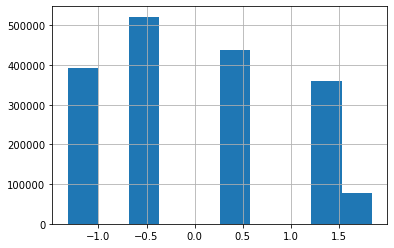

In [9]:
df['median_age'].hist()

In [ ]:
################################################################################################################################

In [8]:
len(df)

1790832

In [9]:
df.isna().sum()

crime_rate       0
felony           0
misdemeanor      0
completed        0
s_native         0
                ..
hispanic_rate    0
black_rate       0
asian_rate       0
labor_part       0
crime_diff       7
Length: 127, dtype: int64

In [10]:
df = df.dropna()
y = np.array(df['crime_rate'])
df = df.drop(['crime_rate'], axis=1)

Xtilde = np.array(df)

In [12]:
lasso = Lasso(alpha = .85)
lasso.fit(Xtilde ,y)
coef = lasso.coef_
print(coef)

[ -0.           0.          -0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.          -0.          -0.           0.          -0.
  -0.          -0.          -0.          -0.           0.
   0.          -0.          -0.          -0.           0.
  -0.          -0.          -0.         -42.00482365 -17.35895502
 -25.04708445   0.4523418    0.          20.08354072  19.33615217
   1.13064244   8.49035905 -12.65742938 -21.76042689   0.
   0.          -0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.          -0.          -0.
   0.          -0.          -0.          -0.           0.
   0.           0.           0.          -0.          -0.
   0.          -0.          -0.           0.          -0.
  -0.          -0.           0.          -0.           0

In [ ]:
lasso.intercept_

In [ ]:
len(coef)

In [11]:
## split data
(Xt ,Xv ,Yt ,Yv)= train_test_split (Xtilde ,y, test_size =0.3 , random_state =0)

## Plot results below
We see that the value of Lambda that performs best are those that are the first in the list of alphas, meaning when lambda is equal to .85. Given this, we will test values in the interval of zero to one to see if there is a better fit within this range.

#### Try alphas between 0 and 1

In [13]:
alphas_01 = np.random.random(10)
alphas_01.sort()
alphas_01

array([0.05627252, 0.53114297, 0.53495463, 0.63059117, 0.68544568,
       0.7354104 , 0.74894536, 0.85111321, 0.85529616, 0.97915958])

In [14]:
res = np.zeros( alphas_01.size)
res

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [68]:
for i in range(len(alphas_used)):
    print (i)
    lasso = Lasso(alpha = alphas_used[i]) ## MAX_ITER = 100000 ???
    lasso.fit(Xt ,Yt)
    Y_pred = lasso.predict(Xv)
    res[i] = np.mean((Yv - Y_pred ) ** 2)

0


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.391e+08, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


1


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.179e+08, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


2


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+07, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


3


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.716e+07, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


4


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e+07, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


5


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.984e+06, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


6


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.871e+06, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


7
8
9


Text(0, 0.5, 'Mean Residual')

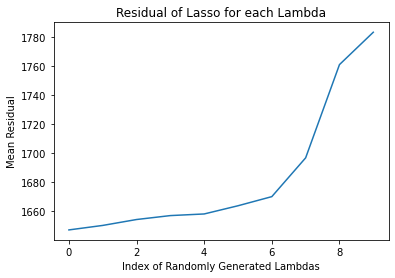

In [69]:
plt.plot(res)
plt.title('Residual of Lasso for each Lambda')
plt.xlabel('Index of Randomly Generated Lambdas')
plt.ylabel('Mean Residual')

In [13]:
alphas_used = []
alphas_used = [.0124, .0325, .0593, .0842, .0943, .156, .235, .471, .853, .954]
indexes = [0,1,2,3,4,5,6,7,8,9]
print(alphas_used)
print(indexes)
table = pd.DataFrame({'Index':indexes, 'Lambda':alphas_used})
table.head(10)

[0.0124, 0.0325, 0.0593, 0.0842, 0.0943, 0.156, 0.235, 0.471, 0.853, 0.954]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


,Index,Lambda
0,0,0.0124
1,1,0.0325
2,2,0.0593
3,3,0.0842
4,4,0.0943
5,5,0.1560
6,6,0.2350
7,7,0.4710
8,8,0.8530
9,9,0.9540


In [72]:
res

array([1647.21751951, 1650.31577742, 1654.39083069, 1657.10061548,
       1658.22614312, 1663.88361001, 1670.18157992, 1696.9345707 ,
       1761.2372887 , 1783.56480892])

## LassoCV

In [14]:
lasso1 = LassoCV(cv = 5)
lasso1.fit(Xtilde ,y)
coef1 = lasso1.coef_


C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.419e+07, tolerance: 2.199e+06
  model = cd_fast.enet_coordinate_descent(


In [15]:
coefCV = []
for i in range(len(coef1)):
    a = np.round(coef1[i],4)
    coefCV.append(a)

In [ ]:
#coefCV

In [16]:
print('Lambda w/ "grid search": ', np.round(alphas_used[0],7))
print('Lambda with 5-fold CV: ', np.round(lasso1.alpha_,7))
lambda_grid = np.round(alphas_used[0],7)
lambda_5cv = np.round(lasso1.alpha_,7)

Lambda w/ "grid search":  0.0124
Lambda with 5-fold CV:  0.0802394


In [18]:
len(coefCV)

126

In [49]:
key_variables = ['Educational attainment', 'Share of pop that is hispanic', 'Poverty Rate', 'February', 'July', 'August', 'April',
                'December', 'Share of pop that is Asian', 'March', 'October', 'November', 'September', 'May', 'Labor Force Participation Rate',
                'June', 'Median Age', 'If crime occured in a Bar/Night Club', 'If a suspect was <18 yrs old', 'If a crime occured on the NYC subway']

In [41]:

#LassoCV_important

## Implement models & Compare performance between Lambda's

In [17]:
## split data
(Xtrain ,Xtest ,Ytrain ,Ytest)= train_test_split (Xtilde ,y, test_size =0.3 , random_state=42, shuffle = True)

In [18]:
Ybar = np.mean(Ytest)

In [19]:
## Model w/ grid Lambda
lasso_grid = Lasso(alpha = lambda_grid)
lasso_grid.fit(Xtrain ,Ytrain)
Y_pred_g = lasso_grid.predict(Xtest)
RSS_g = np.sum((Ytest - Y_pred_g)**2)
TSS_g = np.sum((Ytest - Ybar)**2)
Rsq_g = 1 - (RSS_g/TSS_g)
coef_g = lasso_grid.coef_
print(coef_g)

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.399e+08, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


NameError: name 'coef' is not defined

In [34]:
coef_rounded = []
for i in range(len(coef_g)):
    r = round(coef_g[i],4)
    coef_rounded.append(r)
coef_g=coef_rounded

In [21]:
lasso_grid.intercept_

461.1476034763196

In [22]:
## Model w/ grid Lambda
lasso_CV = Lasso(alpha = lambda_5cv)
lasso_CV.fit(Xtrain ,Ytrain)
Y_pred_cv = lasso_CV.predict(Xtest)
RSS_cv = np.sum((Ytest - Y_pred_cv)**2)
TSS_cv = np.sum((Ytest - Ybar)**2)
Rsq_cv = 1 - (RSS_cv/TSS_cv)

C:\Users\david\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.694e+07, tolerance: 1.541e+06
  model = cd_fast.enet_coordinate_descent(


In [45]:
lasso_CV.coef_

-0.0

In [23]:
print("Rsq w/ grid search: ", round(Rsq_g,4)*100)
print("Rsq w/ 5 fold CV: ", round(Rsq_cv,4)*100)

Rsq w/ grid search:  86.56
Rsq w/ 5 fold CV:  86.49


In [24]:
RMSE_g = ((np.sum((Y_pred_g - Ytest)**2))/len(Ytest))**.5
RMSE_g

40.58684643417666

In [25]:
RMSE_cv = ((np.sum((Y_pred_cv - Ytest)**2))/len(Ytest))**.5
RMSE_cv

40.699492160909344

### Top coefficients in grid search

In [48]:
variables_grid = ['Bronx','Queens','Educational attainment','February', 'July','August','Hispanic share of population', 'April',
                 'December','October', 'March', 'Staten Island', 'Labor Force Participation Rate', 'Brooklyn',
                 'Homeless Shelter', 'Population Median Age', 'November', 'September', 'May', 'Bar/Nightclub']

In [62]:
#coefCV
Lassog_coefs = pd.DataFrame(df.columns)
Lassog_coefs['Columns'] = Lassog_coefs[0]
Lassog_coefs['Coefficient'] = coef_g
Lassog_coefs = Lassog_coefs.drop(0, axis=1)
Lassog_coefs['|coefficient|'] = Lassog_coefs['Coefficient'].abs()
Lassog_coefs = Lassog_coefs.sort_values(by=['|coefficient|'], ascending=False)
Lassog_coefs.head(20)
Lassog_important = Lassog_coefs.head(20)
#LassoCV_coefs.head(20)
Lassog_important['Variable Description'] = variables_grid
Lassog_important = Lassog_important.reset_index()
#LassoCV_important = LassoCV_important.drop('index', axis=1)
Lassog_important['Coefficients'] = Lassog_important['Coefficient']
Lassog_important['|coefficients|'] = Lassog_important['|coefficient|']
Lassog_important = Lassog_important.drop(['index', 'Columns','Coefficient','|coefficient|'],axis=1)
#Lassog_important

<ipython-input-62-2dd9555eeb7b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lassog_important['Variable Description'] = variables_grid


### Top coefficients w/ CV Lambda

In [54]:
variables_cv = ['Educational attainment', 'Hispanic share of population', 'Poverty Rate', 'February', 'July','August','April', 'December',
               'Asian share of population','March','October','November','September','May','Labor force participation rate','June',
               'Population Median Age', 'Bar/Nightclub','Suspect under 18 yrs old', 'Transit crimes: Subway']

In [123]:
#coefCV
LassoCV_coefs = pd.DataFrame(df.columns)
LassoCV_coefs['Columns'] = LassoCV_coefs[0]
LassoCV_coefs['Coefficient'] = np.round(lasso_CV.coef_,4)
LassoCV_coefs = LassoCV_coefs.drop(0, axis=1)
LassoCV_coefs['|coefficient|'] = LassoCV_coefs['Coefficient'].abs()
LassoCV_coefs = LassoCV_coefs.sort_values(by=['|coefficient|'], ascending=False)
LassoCV_coefs.head(20)
LassoCV_important = LassoCV_coefs.head(20)
LassoCV_coefs.head(20)
LassoCV_important['Variable Description'] = variables_cv
LassoCV_important = LassoCV_important.reset_index()
LassoCV_important = LassoCV_important.drop('index', axis=1)
LassoCV_important['Coefficients'] = LassoCV_important['Coefficient']
LassoCV_important['|coefficients|'] = LassoCV_important['|coefficient|']
LassoCV_important = LassoCV_important.drop(['Columns','Coefficient','|coefficient|'],axis=1)
#LassoCV_important 

<ipython-input-123-1514f6eacff4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  LassoCV_important['Variable Description'] = variables_cv


In [124]:
#LassoCV_important

In [56]:
lasso_CV.intercept_


465.42918993027354

In [59]:
## Table for performance results
model = ['Lasso CV Lambda', 'Grid Search Lambda']
lambdas = [.0802, .0124]
R_squared = [.8649, .8656]
RMSE= [40.699, 40.587]
Intercept  = [465.429,461.148]
pd.DataFrame({'Model': model, 'Lambda':lambdas, 'R-squared':R_squared, 'RMSE':RMSE, 'Intercept':Intercept})

,Model,Lambda,R-squared,RMSE,Intercept
0,Lasso CV Lambda,0.0802,0.8649,40.699,465.429
1,Grid Search Lambda,0.0124,0.8656,40.587,461.148


# Ridge Regression Models

In [61]:
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge

In [64]:
ridge1 = RidgeCV(cv = 5)
ridge1.fit(Xtilde,y)


NameError: name 'ridge_cv' is not defined

In [66]:
y_pred_1 = ridge1.predict(Xtilde)
coef_1 = ridge1.coef_
#print(np.round(coef_1 ,4))

In [67]:
ridge1.alpha_

10.0

#### Crid search alphas for Ridge:

In [134]:
alphas_ridge = np.array([8.1, 10.5, 11.7, 13, 14.7, 15.3, 16.0,20,23.3,25.1])
res1 = np.zeros( alphas_ridge.size)
res1

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [135]:
for i in range(len(alphas_ridge)):
    print (i)
    ridge = Ridge(alpha = alphas_ridge[i]) ## MAX_ITER = 100000 ???
    ridge.fit(Xt ,Yt)
    Y_pred = ridge.predict(Xv)
    res1[i] = np.mean((Yv - Y_pred ) ** 2)

0
1
2
3
4
5
6
7
8
9


In [138]:
index = np.array([0,1,2,3,4,5,6,7,8,9])
res1
pd.DataFrame({'Index':index, 'lambdas':alphas_ridge, 'Mean Residual':np.round(res1,5)})

,Index,lambdas,Mean Residual
0,0,8.1,1645.56490
1,1,10.5,1645.56458
2,2,11.7,1645.56447
3,3,13.0,1645.56439
4,4,14.7,1645.56433
5,5,15.3,1645.56432
6,6,16.0,1645.56431
7,7,20.0,1645.56436
8,8,23.3,1645.56450
9,9,25.1,1645.56460


Text(0, 0.5, 'Mean Residual')

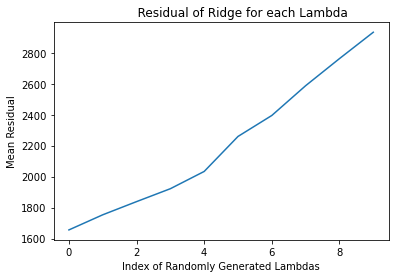

In [133]:
plt.plot(np.round(res,4))
plt.title('           Residual of Ridge for each Lambda')
plt.xlabel('Index of Randomly Generated Lambdas')
plt.ylabel('Mean Residual')

#### Ridge using top lambdas from CV & Grid search

In [139]:
## Ridge Model w/ grid Lambda
ridge_grid = Ridge(alpha = 16.0)
ridge_grid.fit(Xtrain ,Ytrain)
Y_pred_g = ridge_grid.predict(Xtest)
RSS_g = np.sum((Ytest - Y_pred_g)**2)
TSS_g = np.sum((Ytest - Ybar)**2)
Rsq_g = 1 - (RSS_g/TSS_g)
coef_g = ridge_grid.coef_
#print(coef_g)

In [141]:
## Ridge Model w/ CV Lambda
ridge_CV = Lasso(alpha = 10.0)
ridge_CV.fit(Xtrain ,Ytrain)
Y_pred_cv = ridge_CV.predict(Xtest)
RSS_cv = np.sum((Ytest - Y_pred_cv)**2)
TSS_cv = np.sum((Ytest - Ybar)**2)
Rsq_cv = 1 - (RSS_cv/TSS_cv)

In [142]:
print("Rsq w/ grid search: ", round(Rsq_g,4)*100)
print("Rsq w/ 5 fold CV: ", round(Rsq_cv,4)*100)

Rsq w/ grid search:  86.58
Rsq w/ 5 fold CV:  75.64


In [143]:
RMSE_g = ((np.sum((Y_pred_g - Ytest)**2))/len(Ytest))**.5
RMSE_g

40.56607741891545

In [144]:
RMSE_cv = ((np.sum((Y_pred_cv - Ytest)**2))/len(Ytest))**.5
RMSE_cv

54.653213400161846

### Ridge Models Tables w/ top 20 coefficients

In [94]:
ridge_variables_grid = ['February', 'Educational attainment', 'Asian share of population', 'July', 'August', 'April', 'Labor Force Participation Rate',
                  'Poverty Rate', 'Hispanice share of population', 'December', 'Homeless Shelter', 'October', 'March',
                  'Black share of population', 'Brooklyn', 'Population Median Age', 'November', 'Unemployment Rate', 'September', 'May']

In [147]:
#coefCV
Ridge_g_coefs = pd.DataFrame(df.columns)
Ridge_g_coefs['Columns'] = Ridge_g_coefs[0]
Ridge_g_coefs['Coefficient'] = np.round(coef_g,4)
Ridge_g_coefs = Ridge_g_coefs.drop(0, axis=1)
Ridge_g_coefs['|coefficient|'] = Ridge_g_coefs['Coefficient'].abs()
Ridge_g_coefs = Ridge_g_coefs.sort_values(by=['|coefficient|'], ascending=False)
Ridge_g_coefs.head(20)
Ridge_g_important = Ridge_g_coefs.head(20)
#LassoCV_coefs.head(20)
Ridge_g_important['Variable Description'] = ridge_variables_grid
Ridge_g_important = Ridge_g_important.reset_index()
#LassoCV_important = LassoCV_important.drop('index', axis=1)
Ridge_g_important['Coefficients'] = Ridge_g_important['Coefficient']
Ridge_g_important['|coefficients|'] = Ridge_g_important['|coefficient|']
Ridge_g_important = Ridge_g_important.drop(['index', 'Columns','Coefficient','|coefficient|'],axis=1)
Ridge_g_important

<ipython-input-147-ad101b15adcc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Ridge_g_important['Variable Description'] = ridge_variables_grid


,Variable Description,Coefficients,|coefficients|
0,February,-48.2831,48.2831
1,Educational attainment,41.3394,41.3394
2,Asian share of population,-37.5861,37.5861
3,July,35.0441,35.0441
4,August,34.2943,34.2943
5,April,-31.1800,31.1800
6,Labor Force Participation Rate,31.0924,31.0924
7,Poverty Rate,30.0481,30.0481
8,Hispanice share of population,29.0718,29.0718
9,December,-27.1336,27.1336


In [99]:
ridge_variables_cv = ['Educational Attainment', 'Asian Share of Population', 'Poverty Rate', 'Hispanic Share of Population', 'Felony Crimes']

In [101]:
#coefCV
RidgeCV_coefs = pd.DataFrame(df.columns)
RidgeCV_coefs['Columns'] = RidgeCV_coefs[0]
RidgeCV_coefs['Coefficient'] = np.round(ridge_CV.coef_, 4)
RidgeCV_coefs = RidgeCV_coefs.drop(0, axis=1)
RidgeCV_coefs['|coefficient|'] =RidgeCV_coefs['Coefficient'].abs()
RidgeCV_coefs = RidgeCV_coefs.sort_values(by=['|coefficient|'], ascending=False)
RidgeCV_coefs.head(5)
RidgeCV_important = RidgeCV_coefs.head(5)
RidgeCV_important['Variable Description'] = ridge_variables_cv
RidgeCV_important = RidgeCV_important.reset_index()
RidgeCV_important = RidgeCV_important.drop('index', axis=1)
RidgeCV_important['Coefficients'] = RidgeCV_important['Coefficient']
RidgeCV_important['|coefficients|'] = RidgeCV_important['|coefficient|']
RidgeCV_important = RidgeCV_important.drop(['Columns','Coefficient','|coefficient|'],axis=1)
RidgeCV_important 

<ipython-input-101-0d3b57de6a9c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RidgeCV_important['Variable Description'] = ridge_variables_cv


,Variable Description,Coefficients,|coefficients|
0,Educational Attainment,54.3582,54.3582
1,Asian Share of Population,-34.8036,34.8036
2,Poverty Rate,32.0848,32.0848
3,Hispanic Share of Population,31.1397,31.1397
4,Felony Crimes,-0.0000,0.0000


##### Table w/ results

In [148]:
## Table for performance results
model = ['Ridge CV Lambda', 'Ridge Grid Search Lambda']
lambdas = [10.0, 16.0]
R_squared = [.7564, .8658]
RMSE= [54.653, 40.566]
Intercept  = [round(ridge_CV.intercept_,3) , round(ridge_grid.intercept_,3)]
pd.DataFrame({'Model': model, 'Lambda':lambdas, 'R-squared':R_squared, 'RMSE':RMSE, 'Intercept':Intercept})

,Model,Lambda,R-squared,RMSE,Intercept
0,Ridge CV Lambda,10.0,0.7564,54.653,464.715
1,Ridge Grid Search Lambda,16.0,0.8658,40.566,468.551


# Elastic Net Models

In [105]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [106]:
en1 = ElasticNetCV(cv = 5)
en1.fit(Xtilde,y)
y_pred_1 = en1.predict(Xtilde)
coef_1 = en1.coef_
en1.alpha_

0.16047873174264976

In [108]:
#print(np.round(coef_1 ,4))

#### Crid search alphas for Elastic Net:

In [110]:
alphas_en = np.array([.0153, .0841, .1348, .1858, .2574, .4131, .5107, .6522, .7835, .9133])
res = np.zeros( alphas_en.size)
res

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [111]:
for i in range(len(alphas_en)):
    print (i)
    en = ElasticNet(alpha = alphas_en[i], l1_ratio = 0.5) ## MAX_ITER = 100000 ???
    en.fit(Xt ,Yt)
    Y_pred = en.predict(Xv)
    res[i] = np.mean((Yv - Y_pred ) ** 2)

0
1
2
3
4
5
6
7
8
9


Text(0, 0.5, 'Mean Residual')

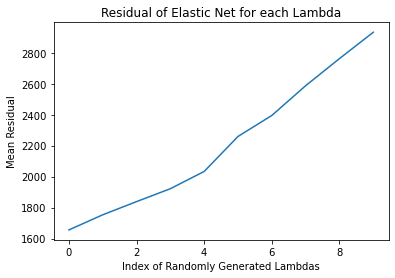

In [149]:
plt.plot(res)
plt.title('Residual of Elastic Net for each Lambda')
plt.xlabel('Index of Randomly Generated Lambdas')
plt.ylabel('Mean Residual')

In [150]:
pd.DataFrame({'Index':index, 'Lambda':alphas_en})

,Index,Lambda
0,0,0.0153
1,1,0.0841
2,2,0.1348
3,3,0.1858
4,4,0.2574
5,5,0.4131
6,6,0.5107
7,7,0.6522
8,8,0.7835
9,9,0.9133


#### Elastic Net using top lambdas from CV & Grid search

In [114]:
## Ridge Model w/ grid Lambda
en_grid = ElasticNet(alpha = .0153)
en_grid.fit(Xtrain ,Ytrain)
Y_pred_g = en_grid.predict(Xtest)
RSS_g = np.sum((Ytest - Y_pred_g)**2)
TSS_g = np.sum((Ytest - Ybar)**2)
Rsq_g = 1 - (RSS_g/TSS_g)
coef_g = en_grid.coef_
#print(coef_g)

In [115]:
## Ridge Model w/ CV Lambda
en_CV = ElasticNet(alpha = .1604)
en_CV.fit(Xtrain ,Ytrain)
Y_pred_cv = en_CV.predict(Xtest)
RSS_cv = np.sum((Ytest - Y_pred_cv)**2)
TSS_cv = np.sum((Ytest - Ybar)**2)
Rsq_cv = 1 - (RSS_cv/TSS_cv)

In [116]:
print("Rsq w/ grid search: ", round(Rsq_g,4)*100)
print("Rsq w/ 5 fold CV: ", round(Rsq_cv,4)*100)
RMSE_g = ((np.sum((Y_pred_g - Ytest)**2))/len(Ytest))**.5
print(RMSE_g)
RMSE_cv = ((np.sum((Y_pred_cv - Ytest)**2))/len(Ytest))**.5
print(RMSE_cv)

Rsq w/ grid search:  86.49
Rsq w/ 5 fold CV:  84.66
40.69426382223112
43.36425000541225


### Elastic Net Models Tables w/ top 20 coefficients

In [118]:
en_variables_grid = ['February','Educational Attainment', 'Asian Share of Population','July', 'August', 'Labor Force Participation Rate',
                    'Poverty rate', 'Hispanic Share of Population', 'April', 'December', 'October', 'March', 'Black share of population',
                    'Brooklyn', 'Population Median Age', 'Unemployment Rate', 'November', 'September', 'May', 'Queens']

In [120]:
#coefCV
en_g_coefs = pd.DataFrame(df.columns)
en_g_coefs['Columns'] = en_g_coefs[0]
en_g_coefs['Coefficient'] = np.round(coef_g, 4)
en_g_coefs = en_g_coefs.drop(0, axis=1)
en_g_coefs['|coefficient|'] = en_g_coefs['Coefficient'].abs()
en_g_coefs = en_g_coefs.sort_values(by=['|coefficient|'], ascending=False)
en_g_coefs.head(20)
en_g_important = en_g_coefs.head(20)
#LassoCV_coefs.head(20)
en_g_important['Variable Description'] = en_variables_grid
en_g_important = en_g_important.reset_index()
#LassoCV_important = LassoCV_important.drop('index', axis=1)
en_g_important['Coefficients'] = en_g_important['Coefficient']
en_g_important['|coefficients|'] = en_g_important['|coefficient|']
en_g_important = en_g_important.drop(['index', 'Columns','Coefficient','|coefficient|'],axis=1)
en_g_important

<ipython-input-120-f176e1420b7a>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  en_g_important['Variable Description'] = en_variables_grid


,Variable Description,Coefficients,|coefficients|
0,February,-43.2989,43.2989
1,Educational Attainment,41.3599,41.3599
2,Asian Share of Population,-37.6850,37.6850
3,July,32.5056,32.5056
4,August,31.8221,31.8221
5,Labor Force Participation Rate,30.7234,30.7234
6,Poverty rate,30.1157,30.1157
7,Hispanic Share of Population,29.1128,29.1128
8,April,-27.8762,27.8762
9,December,-24.2792,24.2792


In [127]:
en_variables_cv = ['Educational attainment', 'Asian share of population', 'Poverty Rate', 'Labor Force Participation Rate',
                  'Hispanic Share of Population', 'February', 'Black share of population', 'July', 'August', 'Brooklyn',
                  'Population Median Age', 'Unemployment Rate', 'April', 'December', 'Queens', 'October', 'March', 'Bronx',
                  'November', 'September']

In [129]:
enCV_coefs = pd.DataFrame(df.columns)
enCV_coefs['Columns'] = enCV_coefs[0]
enCV_coefs['Coefficient'] = np.round(en_CV.coef_, 4)
enCV_coefs = enCV_coefs.drop(0, axis=1)
enCV_coefs['|coefficient|'] =enCV_coefs['Coefficient'].abs()
enCV_coefs = enCV_coefs.sort_values(by=['|coefficient|'], ascending=False)
enCV_coefs.head(20)
enCV_important = enCV_coefs.head(20)
enCV_important['Variable Description'] = en_variables_cv
enCV_important = enCV_important.reset_index()
enCV_important = enCV_important.drop('index', axis=1)
enCV_important['Coefficients'] = enCV_important['Coefficient']
enCV_important['|coefficients|'] = enCV_important['|coefficient|']
enCV_important = enCV_important.drop(['Columns','Coefficient','|coefficient|'],axis=1)
enCV_important 

<ipython-input-129-f045bd581d6b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enCV_important['Variable Description'] = en_variables_cv


,Variable Description,Coefficients,|coefficients|
0,Educational attainment,38.4415,38.4415
1,Asian share of population,-36.7188,36.7188
2,Poverty Rate,28.2675,28.2675
3,Labor Force Participation Rate,27.2998,27.2998
4,Hispanic Share of Population,26.5528,26.5528
5,February,-22.6558,22.6558
6,Black share of population,-18.0391,18.0391
7,July,17.9947,17.9947
8,August,17.6393,17.6393
9,Brooklyn,-17.0195,17.0195


##### Table w/ results

In [131]:
## Table for performance results
model = ['Elastic Net CV Lambda', 'Elastic Net Grid Search Lambda']
lambdas = [.1605, .0153]
R_squared = [.8466, .8649]
RMSE= [43.364, 40.694]
Intercept  = [round(en_CV.intercept_,3) , round(en_grid.intercept_,3)]
pd.DataFrame({'Model': model, 'Lambda':lambdas, 'R-squared':R_squared, 'RMSE':RMSE, 'Intercept':Intercept})

,Model,Lambda,R-squared,RMSE,Intercept
0,Elastic Net CV Lambda,0.1605,0.8466,43.364,470.476
1,Elastic Net Grid Search Lambda,0.0153,0.8649,40.694,469.305
